In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Download the stock price data off [macotrends.net](https://www.macrotrends.net/stocks/charts/FB/facebook/stock-price-history)
I had to download them individually for all FAANG Companies.

[Facebook = FB](https://www.macrotrends.net/stocks/charts/FB/facebook/stock-price-history)

[Apple = AAPL](https://www.macrotrends.net/stocks/charts/AAPL/apple/stock-price-history)

[Amazon = AMZN](https://www.macrotrends.net/stocks/charts/AMZN/amazon/stock-price-history)

[Netflix = NFLX](https://www.macrotrends.net/stocks/charts/NFLX/netflix/stock-price-history)

[Google = GOOG](https://www.macrotrends.net/stocks/charts/GOOG/alphabet/stock-price-history)

In [312]:
#importing the dataframes, inferring datetime and then naming the dataframes so that we can use this in a loop to add in our 'company' field
fb = pd.read_csv(r'C:\Users\ABAL650\Documents\IBM_Data_Science\Projects\Netflix\MacroTrends_Data_Download_FB.csv', infer_datetime_format = True, header = 9, parse_dates = True)
fb.name = 'FB'
aapl = pd.read_csv(r'C:\Users\ABAL650\Documents\IBM_Data_Science\Projects\Netflix\MacroTrends_Data_Download_AAPl.csv', infer_datetime_format = True, header = 9, parse_dates = True)
aapl.name = 'AAPL'
amzn = pd.read_csv(r'C:\Users\ABAL650\Documents\IBM_Data_Science\Projects\Netflix\MacroTrends_Data_Download_AMZN.csv', infer_datetime_format = True, header = 9, parse_dates = True)
amzn.name = 'AMZN'
nflx = pd.read_csv(r'C:\Users\ABAL650\Documents\IBM_Data_Science\Projects\Netflix\MacroTrends_Data_Download_NFLX.csv', infer_datetime_format = True, header = 9, parse_dates = True)
nflx.name = 'NFLX'
goog = pd.read_csv(r'C:\Users\ABAL650\Documents\IBM_Data_Science\Projects\Netflix\MacroTrends_Data_Download_GOOG.csv', infer_datetime_format = True, header = 9, parse_dates = True)
goog.name = 'GOOG'

In [313]:
#having a look at the names of our columns
fb.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [314]:
#looking at our datetime structure so we can convert to datetime (it didnt seem to work in pd.read_csv)
fb.date[0]

'2012-05-18'

In [315]:
#creating a short function to clean ur dataframes which is applied to all
def clean(df):
    df.drop(['open', 'high', 'low', 'volume'], axis =1, inplace = True)
    df.date = pd.to_datetime(df.date, format = '%Y-%m-%d')
    df['company'] = '{}'.format(df.name)
    return df

In [316]:
#Applying the function
dfs = [fb, aapl, amzn, nflx, goog]

for d in dfs:
    d = clean(d)

In [317]:
#Stacking the columns on top of one another for our first initial dataframe
df_con = pd.concat(dfs)
#double df_con.head()

In [318]:
#double checking that we've got the right data types
df_con.dtypes

date       datetime64[ns]
close             float64
company            object
dtype: object

In [319]:
#We're only interested in this years data
import datetime as dt
df_con = df_con[df_con.date.dt.year == 2020].reset_index(drop = True)
df_con.head()

,date,close,company
0,2020-01-02,209.78,FB
1,2020-01-03,208.67,FB
2,2020-01-06,212.60,FB
3,2020-01-07,213.06,FB
4,2020-01-08,215.22,FB


In [320]:
#creatinga pivot table to shape the data for plotting
df_con_pivoted = pd.pivot_table(df_con, values = ['close'], columns = ['company'], index = ['date'])
df_con_pivoted.head()

close                                  
company       AAPL     AMZN      FB     GOOG    NFLX
date                                                
2020-01-02  300.35  1898.01  209.78  1367.37  329.81
2020-01-03  297.43  1874.97  208.67  1360.66  325.90
2020-01-06  299.80  1902.88  212.60  1394.21  335.83
2020-01-07  298.39  1906.86  213.06  1393.34  330.75
2020-01-08  303.19  1891.97  215.22  1404.32  339.26

In [321]:
df_con_pivoted.columns

MultiIndex(levels=[['close'], ['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX']],
           codes=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]],
           names=[None, 'company'])

In [322]:
#trying to navigate through the multi-level indexes to simplify
df_con_pivoted.columns = df_con_pivoted.columns.droplevel()
df_con_pivoted.head()

company,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2020-01-02,300.35,1898.01,209.78,1367.37,329.81
2020-01-03,297.43,1874.97,208.67,1360.66,325.90
2020-01-06,299.80,1902.88,212.60,1394.21,335.83
2020-01-07,298.39,1906.86,213.06,1393.34,330.75
2020-01-08,303.19,1891.97,215.22,1404.32,339.26


In [323]:
df_con_pivoted.columns

Index(['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX'], dtype='object', name='company')

In [324]:
df_con_pivoted.columns.name = None
df_con_pivoted.columns

Index(['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX'], dtype='object')

In [325]:
df_con_pivoted.head()

,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2020-01-02,300.35,1898.01,209.78,1367.37,329.81
2020-01-03,297.43,1874.97,208.67,1360.66,325.90
2020-01-06,299.80,1902.88,212.60,1394.21,335.83
2020-01-07,298.39,1906.86,213.06,1393.34,330.75
2020-01-08,303.19,1891.97,215.22,1404.32,339.26


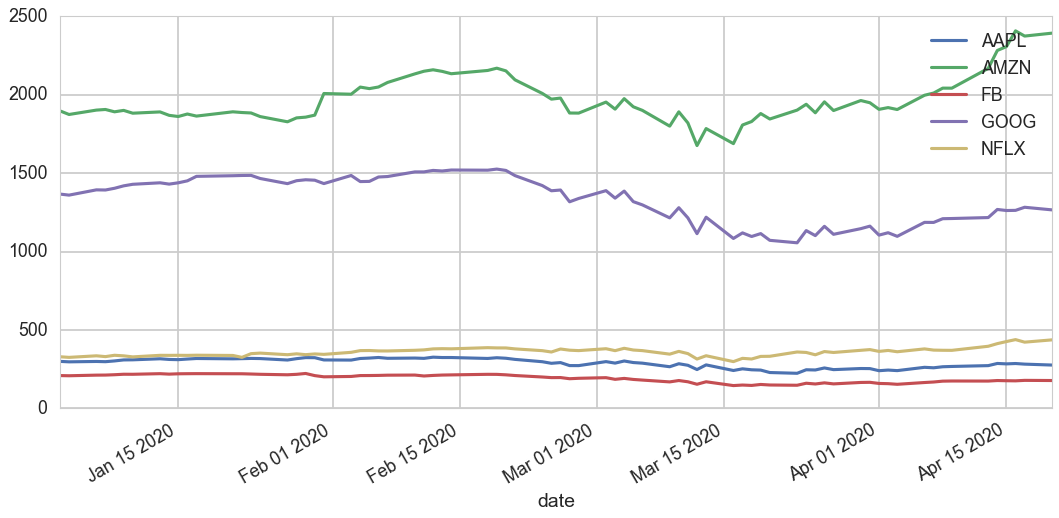

In [326]:
#first simplified plot of stock price over time
df_con_pivoted.plot(grid = True)

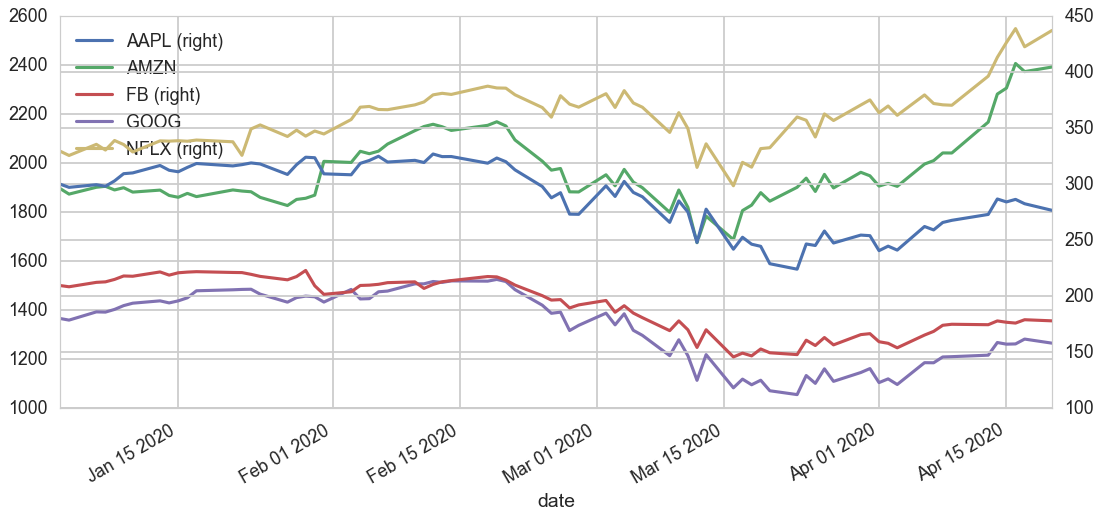

In [327]:
#As the scale it too large we put Apple, Netflix and Facebook on a different scale
df_con_pivoted.plot(secondary_y = ['FB', 'NFLX', 'AAPL'], grid = True)

In [328]:
#Plot looking at return over time for 2020
# df_pivoted.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = df_con_pivoted.apply(lambda x: x / x[0]) #x[0] is the first number in the dataframe corresponding to the first date
stock_return.head()

,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.990278,0.987861,0.994709,0.995093,0.988145
2020-01-06,0.998169,1.002566,1.013443,1.019629,1.018253
2020-01-07,0.993474,1.004663,1.015635,1.018993,1.002850
2020-01-08,1.009456,0.996818,1.025932,1.027023,1.028653


In [329]:
print (plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


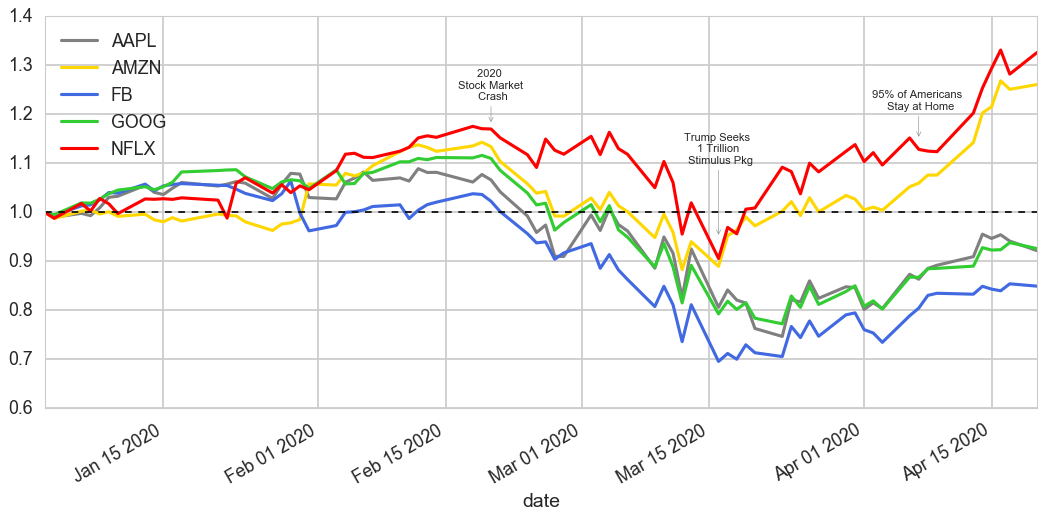

In [330]:
#Plot looking at return over time for 2020
from pylab import rcParams
plt.style.use('seaborn-deep')
colors = ['gray', 'gold', 'royalblue', 'limegreen', 'r']
stock_return.plot(grid = True, color = colors).axhline(y = 1, color = "black", lw = 1.5, linestyle = "--")
plt.annotate('2020 \n Stock Market \n Crash', xy = (pd.Timestamp('2020-02-20'), 1.18), ha= 'center', arrowprops={'arrowstyle':'->', 'color':'gray'}, xytext=(pd.Timestamp('2020-02-20'), 1.23))
plt.annotate('Trump Seeks \n 1 Trillion \n Stimulus Pkg', xy = (pd.Timestamp('2020-03-16'), 0.95), ha= 'center', arrowprops={'arrowstyle':'->', 'color':'gray'}, xytext=(pd.Timestamp('2020-03-16'), 1.1))
plt.annotate('95% of Americans \n Stay at Home', xy = (pd.Timestamp('2020-04-07'), 1.15), ha= 'center', arrowprops={'arrowstyle':'->', 'color':'gray'}, xytext=(pd.Timestamp('2020-04-07'), 1.21))
rcParams['figure.figsize'] = 16, 7

In [331]:
#Creating a plot to look at daily percentage change in stock price- but too much noise!
df_con_pivoted_g = df_con_pivoted.pct_change()
df_con_pivoted_g.head()

,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,-0.005291,-0.004907,-0.011855
2020-01-06,0.007968,0.014886,0.018834,0.024657,0.030469
2020-01-07,-0.004703,0.002092,0.002164,-0.000624,-0.015127
2020-01-08,0.016086,-0.007809,0.010138,0.007880,0.025729


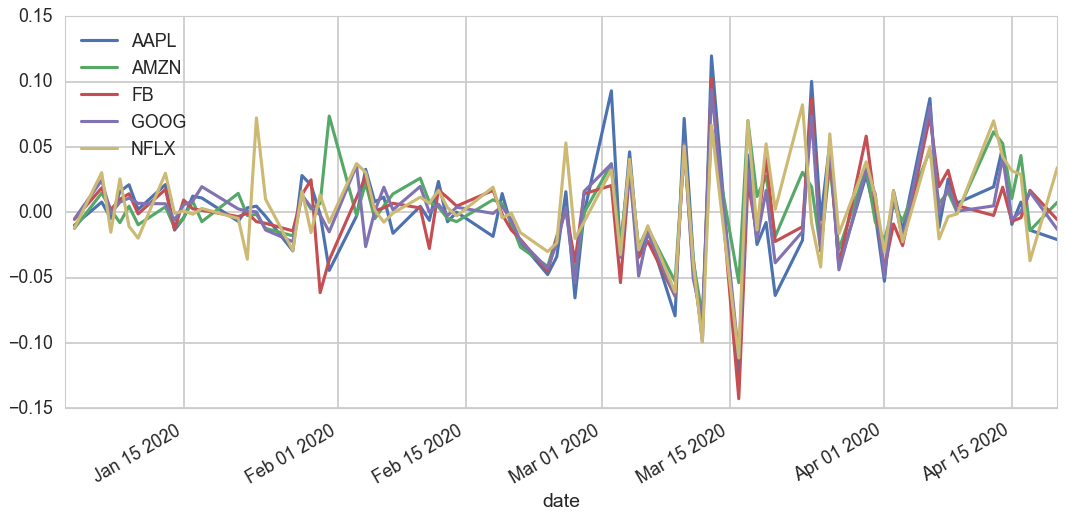

In [332]:
df_con_pivoted_g.plot(grid = True)

In [333]:
# df_pivoted.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return_perc = df_con_pivoted.apply(lambda x: ((x - x[0]) / x[0])*100) #x[0] is the first number in the dataframe corresponding to the first date
stock_return_perc.head()

,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,-0.972199,-1.213903,-0.529126,-0.490723,-1.185531
2020-01-06,-0.183120,0.256585,1.344265,1.962892,1.825293
2020-01-07,-0.652572,0.466278,1.563543,1.899266,0.285013
2020-01-08,0.945564,-0.318228,2.593193,2.702268,2.865286


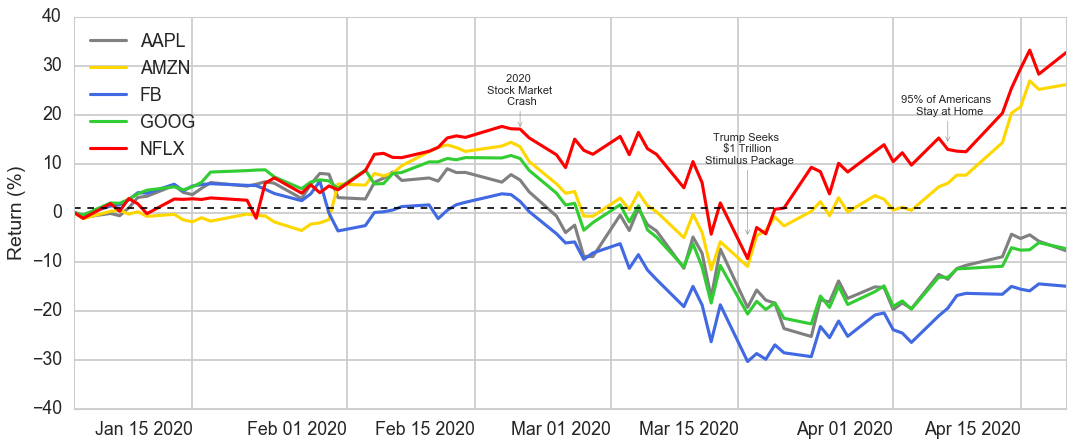

In [334]:
from pylab import rcParams
plt.style.use('seaborn-deep')
colors = ['gray', 'gold', 'royalblue', 'limegreen', 'r']
stock_return_perc.plot(grid = True, color = colors).axhline(y = 1, color = "black", lw = 1.5, linestyle = "--")
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('Return (%)')
plt.annotate('2020 \n Stock Market \n Crash', xy = (pd.Timestamp('2020-02-20'), 17), ha= 'center', arrowprops={'arrowstyle':'->', 'color':'gray'}, xytext=(pd.Timestamp('2020-02-20'), 22))
plt.annotate('Trump Seeks \n $1 Trillion \n Stimulus Package', xy = (pd.Timestamp('2020-03-16'), -5), ha= 'center', arrowprops={'arrowstyle':'->', 'color':'gray'}, xytext=(pd.Timestamp('2020-03-16'), 10))
plt.annotate('95% of Americans \n Stay at Home', xy = (pd.Timestamp('2020-04-07'), 14), ha= 'center', arrowprops={'arrowstyle':'->', 'color':'gray'}, xytext=(pd.Timestamp('2020-04-07'), 20))
rcParams['figure.figsize'] = 16, 7
plt.savefig(r'C:\Users\ABAL650\Documents\IBM_Data_Science\Projects\Netflix\FAANGplot.png')

In [335]:
stock_return_perc_nfx = stock_return_perc.reset_index()
stock_return_perc_nfx = stock_return_perc_nfx[stock_return_perc_nfx.date >= pd.Timestamp('2020-04-01') ].reset_index(drop = True)
stock_return_perc_nfx = stock_return_perc_nfx.set_index('date')
stock_return_perc_nfx.head()

,AAPL,AMZN,FB,GOOG,NFLX
date,,,,,
2020-04-01,-19.790245,0.510535,-23.920297,-19.142588,10.390831
2020-04-02,-18.451806,1.096938,-24.592430,-18.029502,12.210060
2020-04-03,-19.623772,0.452052,-26.503957,-19.708638,9.687396
2020-04-06,-12.611953,5.246548,-21.083993,-13.196867,15.205725
2020-04-07,-13.624105,5.984689,-19.520450,-13.226852,12.877111


In [336]:
april = stock_return_perc_nfx.resample('M').mean()

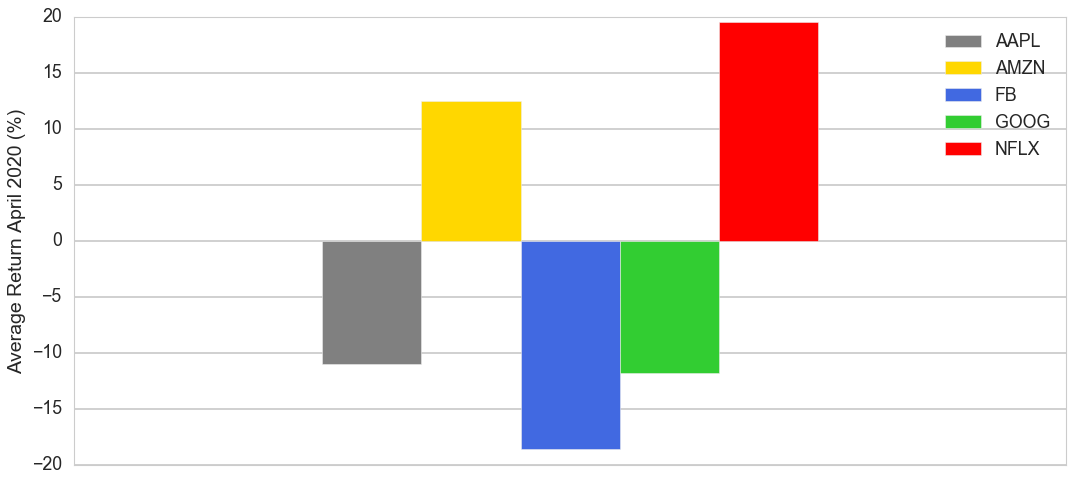

In [337]:
plt.style.use('seaborn-deep')
colors = ['gray', 'gold', 'royalblue', 'limegreen', 'red']
april.plot(kind = 'bar', color = colors)
plt.xlabel('')
plt.xticks(np.arange(0), 'April', rotation = 0)
plt.ylabel('Average Return April 2020 (%)');
rcParams['figure.figsize'] = 16, 7
plt.savefig(r'C:\Users\ABAL650\Documents\IBM_Data_Science\Projects\Netflix\FAANGplotAprReturns.png')

Text(0, 0.5, 'Return (%)')

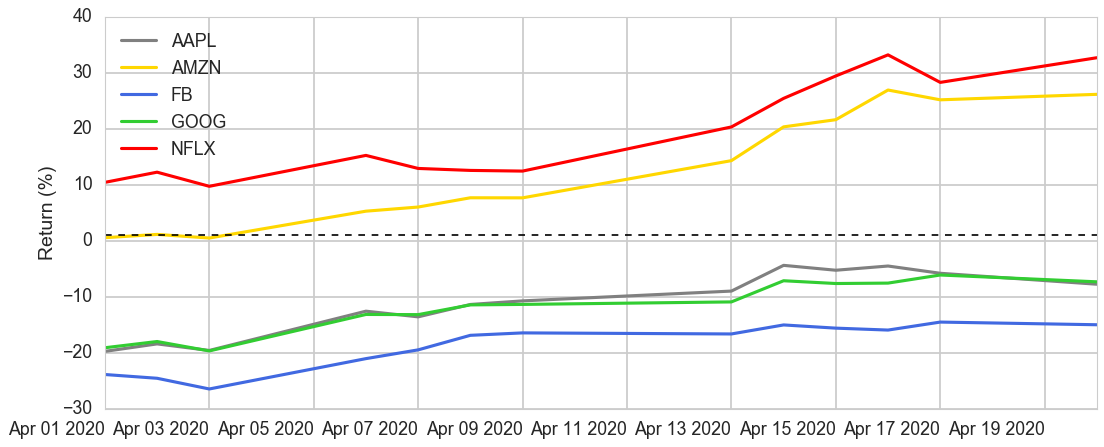

In [338]:
from pylab import rcParams
plt.style.use('seaborn-deep')
colors = ['gray', 'gold', 'royalblue', 'limegreen', 'r']
stock_return_perc_nfx.plot(grid = True, color = colors).axhline(y = 1, color = "black", lw = 1.5, linestyle = "--")
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('Return (%)')